## Predicting Loan Eligibility

OBJECTIVE: Classification problem where we have to predict whether a loan would be approved or not.

FEATURES

Loan_ID	: Unique Loan ID

Gender	: Male / Female

Married	: Applicant married (Y/N)

Dependents	: Number of dependents

Education	: Applicant Education (Graduate/ Under Graduate)

Self_Employed	: Self employed (Y/N)

ApplicantIncome	: Applicant income

CoapplicantIncome	: Coapplicant income

LoanAmount	: Loan amount in thousands

Loan_Amount_Term	: Term of loan in months

Credit_History	: Credit history meets guidelines

Property_Area	: Urban/ Semi Urban/ Rural

Loan_Status	: Loan approved (Y/N)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_acceptance_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
# filling Gender with mode Gender value

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [9]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Married

In [10]:
df[pd.isnull(df['Married'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [13]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Dependents

In [14]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Self Employed

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [19]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Loan Amount

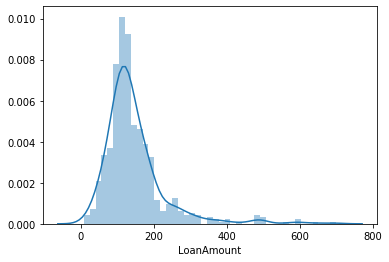

In [20]:
sns.distplot(df['LoanAmount'])

In [21]:
# as median value is lower than mean in case of right-skewed Loan Amount, so imputing it with median values

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

Loan Amount Term

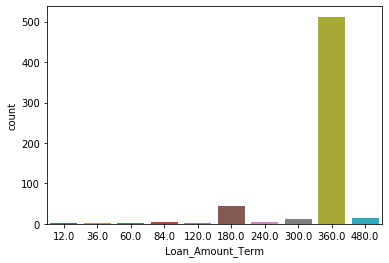

In [22]:
sns.countplot(df['Loan_Amount_Term'])

In [23]:
# imputing Loan Amount Term with median values

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

Credit History

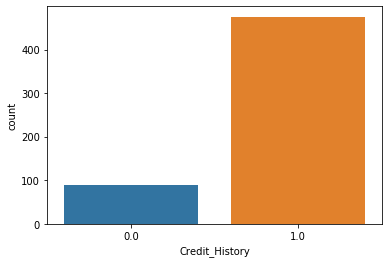

In [24]:
sns.countplot(df['Credit_History'])

In [25]:
# imputing Credit_History with mode values

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [26]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Exploratory Data Analysis

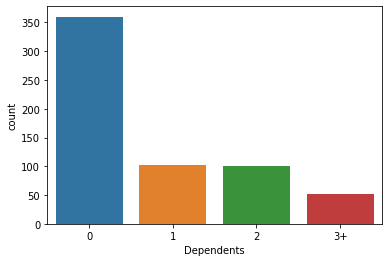

In [27]:
sns.countplot(df['Dependents'])

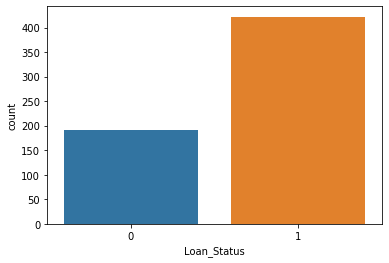

In [59]:
sns.countplot(df['Loan_Status'])

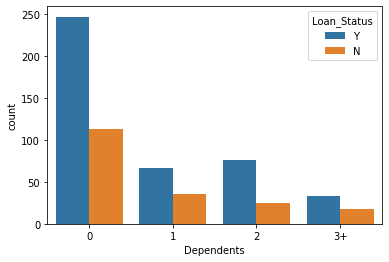

In [28]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

When the number of dependents is 2 there is more chance of getting loan approval compared to when the number of dependents is 1, even though both has similar data count.

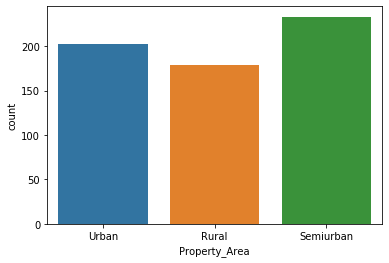

In [29]:
sns.countplot(df['Property_Area'])

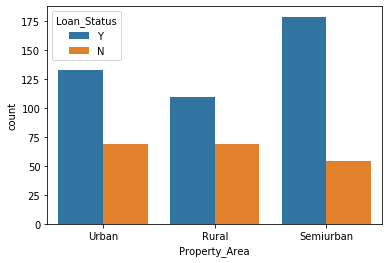

In [30]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

Most of the person is from Semiurban area, and highest Loan acceptance is from that area.

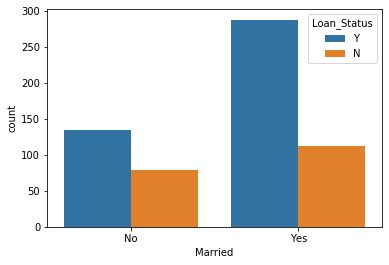

In [31]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

More chances of getting loan approval for Married people.

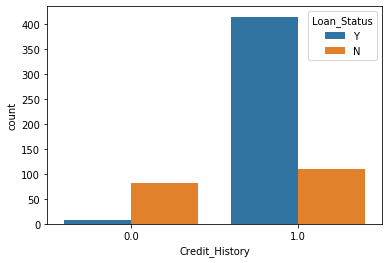

In [32]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])

There is very rare chance of getting loan if the person has no credit history.

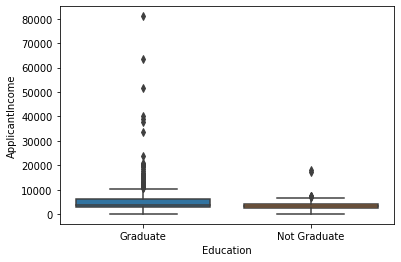

In [33]:
sns.boxplot(df['Education'], df['ApplicantIncome'])

Even though there is not much difference between the mean income of graduate and non-graduates, there are more number of Graduates with very high incomes compared to Not Graduates.

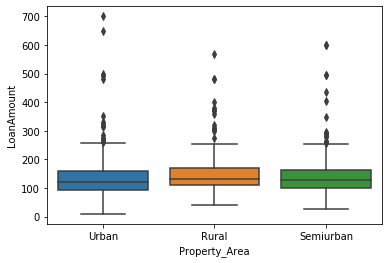

In [34]:
sns.boxplot(df['Property_Area'],df['LoanAmount'])

Median Loan Amount provided to Rural Area is slightly higher than Urban. But there are some people in Urban who has got higher loan amounts compared to Rural or Semi urban.

## Total Income

In [35]:
# combining both incomes to get total income

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


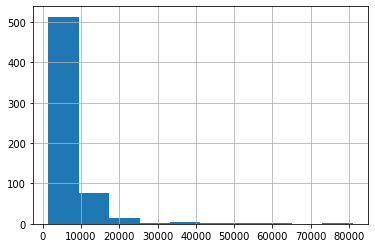

In [36]:
df['Total_Income'].hist()

## One Hot Encoding

In [37]:
dummies = pd.get_dummies(df['Gender'])
dummies.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
merged = pd.concat([df,dummies], axis = 'columns')
merged.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Female,Male
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0,1


In [39]:
df = merged.drop(['Gender','Female'], axis = 'columns')
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1


## Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
cols = ['Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in cols:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,LP001002,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,1
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,1
2,LP001005,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,1
3,LP001006,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
 12  Total_Income       614 non-null    float64
 13  Male               614 non-null    uint8  
dtypes: float64(5), int32(6), int64(1), object(1), uint8(1)
memory usage: 48.7+ KB


## Feature Selection and Scaling

In [42]:
# dropping columns which are not required for model building

df=df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis = 1)
df.head()

,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Male
0,0,0,0,0,128.0,360.0,1.0,2,1,5849.0,1
1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0,1
2,1,0,0,1,66.0,360.0,1.0,2,1,3000.0,1
3,1,0,1,0,120.0,360.0,1.0,2,1,4941.0,1
4,0,0,0,0,141.0,360.0,1.0,2,1,6000.0,1


In [43]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [44]:
# scale only training data based on Min Max Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [45]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.000000,0.0,0.0,0.172214,0.74359,1.0,1.0,0.055394,1.0
1,1.0,0.333333,0.0,0.0,0.172214,0.74359,1.0,0.0,0.058435,1.0
2,1.0,0.000000,0.0,1.0,0.082489,0.74359,1.0,1.0,0.019583,1.0
3,1.0,0.000000,1.0,0.0,0.160637,0.74359,1.0,1.0,0.043980,1.0
4,0.0,0.000000,0.0,0.0,0.191027,0.74359,1.0,1.0,0.057292,1.0


## K Nearest Neighbors

In [46]:
# finding accuracy for user given random k value

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
gen_score = accuracy_score(y_test, y_preds)
print("Accuracy is", round(gen_score*100,2)) # general accuracy
cval_score = np.mean(cross_val_score(model, X, y, cv=5)) # accuracy using 5 fold cross validation
print("Mean accuracy after Cross validation is", round(cval_score*100,2))

Accuracy is 69.92
Mean accuracy after Cross validation is 75.09


In [47]:
# finding out optimised value for k

from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_val_list = []

iter_len=len(X_test)
iter_size=round(sqrt(iter_len))

for k in range(iter_size):
    k = k+1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_preds))
    rmse_val_list.append(error) #in empty list appending error values

print("The minimum error we get is :", min(rmse_val_list))
print("The correponding k value is :", 1+rmse_val_list.index(min(rmse_val_list))) #basic index in list is 0, so add 1

k1 = 1+rmse_val_list.index(min(rmse_val_list))

The minimum error we get is : 0.5100613704506707
The correponding k value is : 5


In [48]:
# getting accuracy with the optimised k value

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
model = KNeighborsClassifier(n_neighbors=k1) # passing random neighbors value
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
gen_score = accuracy_score(y_test, y_preds)
print("Accuracy is", round(gen_score*100,2)) # general accuracy
cval_score = np.mean(cross_val_score(model, X, y, cv=5)) # accuracy using 5 fold cross validation
print("Mean accuracy after Cross validation is", round(cval_score*100,2))

Accuracy is 73.98
Mean accuracy after Cross validation is 78.51


Accuracy using KNN is 73.98% and using KNN with K-Fold Cross Validation is 78.51%.

## Decision Tree

In [56]:
# without Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred,y_test)*100

67.47967479674797

In [57]:
# with Hyperparameter Tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes':list(range(2,20)),'min_samples_split':[2,3,4,5], 'max_depth':list(range(3,10))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=5)
grid_search_cv.fit(X,y)
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred,y_test)*100

74.79674796747967

Accuracy using Decision Tree is 67.47% and using Decision Tree with Hyperparameter Tuning is 74.79%.

## Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def scores(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    gen_score = accuracy_score(y_test, y_preds)
    print("Accuracy is", round(gen_score*100,2)) # general accuracy
    cval_score = np.mean(cross_val_score(model, X, y, cv=5)) # accuracy using 5 fold cross validation
    print("Mean accuracy after Cross validation is", round(cval_score*100,2))

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores(model, X, y)

Accuracy is 74.8
Mean accuracy after Cross validation is 80.95


Accuracy using Logistic Regression is 74.8% and using Logistic Regression with K-Fold Cross Validation is 80.95%.

## Classification Report

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[21 30]
 [ 7 65]]
              precision    recall  f1-score   support

           0       0.75      0.41      0.53        51
           1       0.68      0.90      0.78        72

    accuracy                           0.70       123
   macro avg       0.72      0.66      0.66       123
weighted avg       0.71      0.70      0.68       123



In [73]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
model = DecisionTreeClassifier(random_state=20) 
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[22 29]
 [13 59]]
              precision    recall  f1-score   support

           0       0.63      0.43      0.51        51
           1       0.67      0.82      0.74        72

    accuracy                           0.66       123
   macro avg       0.65      0.63      0.62       123
weighted avg       0.65      0.66      0.64       123



In [68]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
model = LogisticRegression(random_state=20) 
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[20 31]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        51
           1       0.70      1.00      0.82        72

    accuracy                           0.75       123
   macro avg       0.85      0.70      0.69       123
weighted avg       0.82      0.75      0.72       123

